## Computing and visualizing feature correlations

In [1]:
!pip install seaborn

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load and read dataset 

In [3]:
melb_data = pd.read_csv('datasets/melb_data_processed.csv')

In [4]:
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### Shape of data frame

In [5]:
melb_data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

### Describe of dataset and mean, standar deviation and min, max value

In [6]:
melb_data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.94,0.96,1.00,2.00,3.0,3.00,10.00
Price,13580.0,1075684.08,639310.72,85000.00,650000.00,903000.0,1330000.00,9000000.00
Distance,13580.0,10.14,5.87,0.00,6.10,9.2,13.00,48.10
Postcode,13580.0,3105.30,90.68,3000.00,3044.00,3084.0,3148.00,3977.00
Bedroom2,13580.0,2.91,0.97,0.00,2.00,3.0,3.00,20.00
Bathroom,13580.0,1.53,0.69,0.00,1.00,1.0,2.00,8.00
Car,13580.0,1.61,0.96,0.00,1.00,2.0,2.00,10.00
Landsize,13580.0,558.42,3990.67,0.00,177.00,440.0,651.00,433014.00
Lattitude,13580.0,-37.81,0.08,-38.18,-37.86,-37.8,-37.76,-37.41
Longtitude,13580.0,145.00,0.10,144.43,144.93,145.0,145.06,145.53


**Note:-** we saw in above cell that feature datasets contains some numerical values and non-numerical values(i.e categorical values). But we know that machine learning model only takes numerical values as input for applying models.

### Select numerical type data

In [7]:
py_num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']  

In [8]:
numerical_columns = list(melb_data.select_dtypes(include=py_num_types).columns)

numerical_columns

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'Propertycount']

### Dropped categorical values

In [9]:
clean_data_numeric = melb_data[numerical_columns]

In [10]:
clean_data_numeric.sample(10)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
7294,2,463000.0,13.9,3020.0,3.0,1.0,1.0,199.0,-37.77610,144.81640,2185.0
10792,2,635000.0,3.5,3207.0,2.0,2.0,1.0,2166.0,-37.84146,144.94121,8648.0
3010,2,640000.0,12.1,3046.0,2.0,1.0,1.0,612.0,-37.71090,144.93890,2606.0
1013,3,495000.0,10.8,3019.0,3.0,2.0,1.0,327.0,-37.78510,144.85170,3589.0
6030,3,605000.0,13.3,3020.0,3.0,1.0,1.0,617.0,-37.76830,144.83140,4217.0
5434,3,1165000.0,2.6,3121.0,3.0,1.0,1.0,167.0,-37.81670,145.00980,14949.0
8484,4,932500.0,14.9,3087.0,4.0,2.0,2.0,585.0,-37.71540,145.07770,2329.0
12620,6,1155000.0,14.7,3152.0,6.0,3.0,3.0,754.0,-37.88153,145.23003,7082.0
5829,3,1120000.0,6.1,3182.0,3.0,2.0,2.0,1039.0,-37.86380,144.98200,13240.0
5902,5,915000.0,9.7,3041.0,5.0,3.0,4.0,754.0,-37.72980,144.91620,3284.0


In [11]:
clean_data_numeric.shape

(13580, 11)

In [12]:
clean_data_numeric = clean_data_numeric.drop(['Lattitude', 
                                              'Longtitude', 
                                              'Postcode' ], axis=1)

In [13]:
clean_data_numeric.shape

(13580, 8)

### Now look, the data type of each columns are convert in correct data type or not?

In [14]:
clean_data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 8 columns):
Rooms            13580 non-null int64
Price            13580 non-null float64
Distance         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13580 non-null float64
Landsize         13580 non-null float64
Propertycount    13580 non-null float64
dtypes: float64(7), int64(1)
memory usage: 848.9 KB


## Features  correlations  
* __Pearson correlation__:-  

Pearson correlation measures the linear association between continuous variables. In other words, this coefficient quantifies the degree to which a relationship between two variables can be described by a line. Remarkably, while correlation can have many interpretations, the same formula developed by Karl Pearson over 120 years ago is still the most widely used today.

In [15]:
pearson_corr = clean_data_numeric.corr(method='pearson')

pearson_corr

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount
Rooms,1.000000,0.496634,0.294203,0.944190,0.592934,0.406935,0.025678,-0.081530
Price,0.496634,1.000000,-0.162522,0.475951,0.467038,0.239109,0.037507,-0.042153
Distance,0.294203,-0.162522,1.000000,0.295927,0.127155,0.260596,0.025004,-0.054910
Bedroom2,0.944190,0.475951,0.295927,1.000000,0.584685,0.403867,0.025646,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.584685,1.000000,0.321014,0.037130,-0.052201
Car,0.406935,0.239109,0.260596,0.403867,0.321014,1.000000,0.026780,-0.024344
Landsize,0.025678,0.037507,0.025004,0.025646,0.037130,0.026780,1.000000,-0.006854
Propertycount,-0.081530,-0.042153,-0.054910,-0.081350,-0.052201,-0.024344,-0.006854,1.000000


* __HeatMap plot__

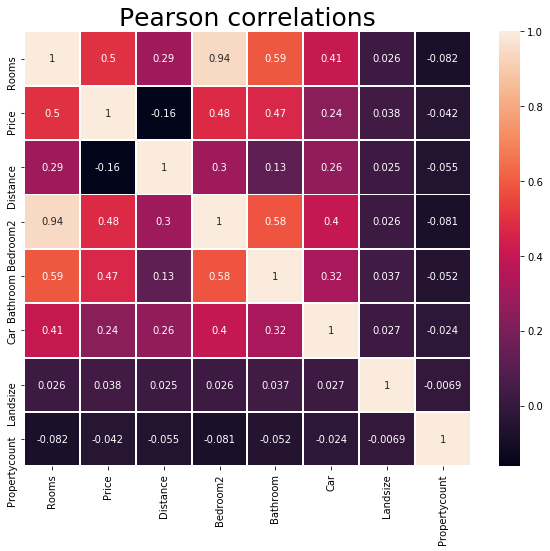

In [16]:
plt.figure(figsize = (10, 8))

sns.heatmap(pearson_corr, 
            linewidth=1, 
            annot=True, 
            annot_kws={'size' : 10} )

plt.title('Pearson correlations', fontsize=25)

plt.show()

* __Spearman correlation__

Spearman's rank correlation coefficient can be defined as a special case of Pearson ρ applied to ranked (sorted) variables. Unlike Pearson, Spearman's correlation is not restricted to linear relationships. Instead, it measures monotonic association (only strictly increasing or decreasing, but not mixed) between two variables and relies on the rank order of values. In other words, rather than comparing means and variances, Spearman's coefficient looks at the relative order of values for each variable. This makes it appropriate to use with both continuous and discrete data

In [17]:
spearman_corr = clean_data_numeric.corr(method='spearman')

spearman_corr

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount
Rooms,1.000000,0.539886,0.351416,0.959668,0.586860,0.473515,0.485742,-0.077651
Price,0.539886,1.000000,-0.129990,0.524029,0.427199,0.289197,0.327200,-0.011409
Distance,0.351416,-0.129990,1.000000,0.358071,0.156650,0.342227,0.417379,-0.141644
Bedroom2,0.959668,0.524029,0.358071,1.000000,0.580364,0.474682,0.479792,-0.076816
Bathroom,0.586860,0.427199,0.156650,0.580364,1.000000,0.369977,0.212134,-0.035286
Car,0.473515,0.289197,0.342227,0.474682,0.369977,1.000000,0.404978,-0.043038
Landsize,0.485742,0.327200,0.417379,0.479792,0.212134,0.404978,1.000000,-0.074200
Propertycount,-0.077651,-0.011409,-0.141644,-0.076816,-0.035286,-0.043038,-0.074200,1.000000


* __Heatmap plot of spearman correlation__

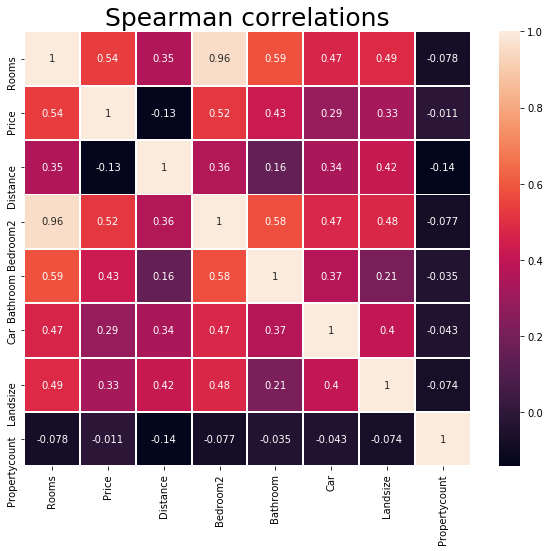

In [18]:
plt.figure(figsize = (10, 8))

sns.heatmap(spearman_corr, 
            linewidth=1, 
            annot=True, 
            annot_kws={'size' : 10} )

plt.title('Spearman correlations', fontsize=25)

plt.show()

* __Kendall correlation__

The third correlation coefficient we will discuss is also based on variable ranks. However, unlike Spearman's coefficient, Kendall's τ does not take into account the difference between ranks — only directional agreement. Therefore, this coefficient is more appropriate for discrete data. for [more](https://www.datascience.com/learn-data-science/fundamentals/introduction-to-correlation-python-data-science)

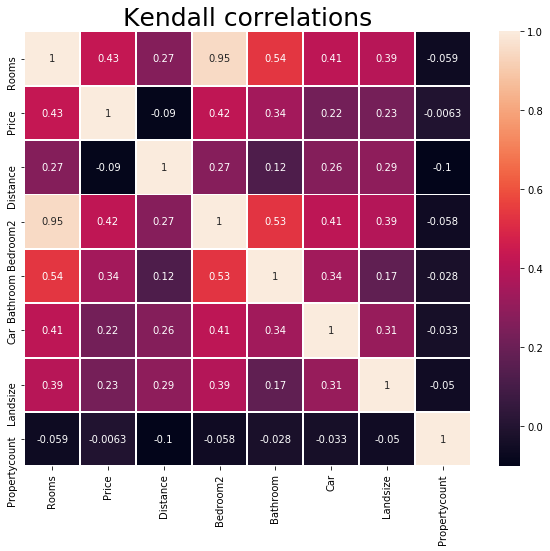

In [19]:
kendall_corr = clean_data_numeric.corr(method='kendall')

plt.figure(figsize = (10, 8))

sns.heatmap(kendall_corr, 
            linewidth=1, 
            annot=True, 
            annot_kws={'size' : 10} )

plt.title('Kendall correlations', fontsize=25)

plt.show()

https://www.scikit-yb.org/en/latest/api/target/feature_correlation.html?highlight=correlation

In [20]:
!pip install yellowbrick --upgrade

Requirement already up-to-date: yellowbrick in /anaconda3/lib/python3.6/site-packages (1.0.post1)


#### Visualize the correlation of the dependent variable with the features
We begin with the numeric features

In [21]:
target = clean_data_numeric['Price']

features = clean_data_numeric.drop('Price', axis=1)

* __Graphical representation of pearson correlation __

In [22]:
from yellowbrick.target import FeatureCorrelation

feature_names = list(features.columns)

#### The default correlation calculated is the Pearson correlation

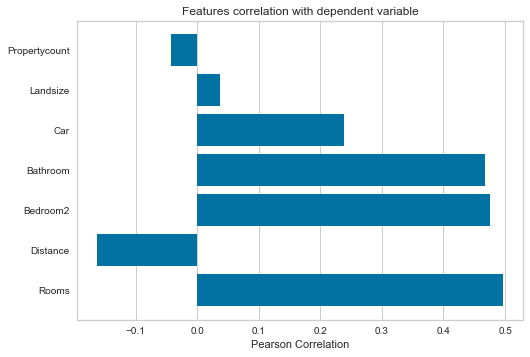

In [23]:
visualizer = FeatureCorrelation(labels = feature_names, method='pearson')

visualizer.fit(features, target)

visualizer.poof()

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html

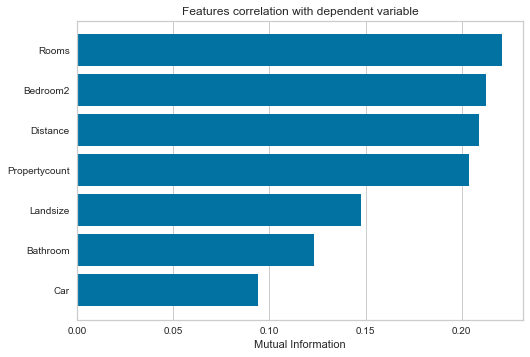

In [24]:
visualizer = FeatureCorrelation(method='mutual_info-regression',
                                feature_names=feature_names, sort=True)

visualizer.fit(features, target)
visualizer.poof()